In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.seterr(divide='ignore')
from operator import itemgetter
import seaborn as sns

## 1. Constructing the networks

In [39]:
#OK, let us start with the graphml file for London's underground
G = nx.read_graphml('london.graph')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
nod_name={e1:e1 for e1, e2 in G.edges()}
nx.set_node_attributes(G,nod_name,'station')

## 2. Topological network

#### Degree Centrality on nodes:

In [126]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [127]:
list(G.nodes(data = True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'station': 'Wembley Park',
  'degree': 0.01,
  'betweenness_t': 10780.813492063491,
  'closeness_t': 0.09465215333648841})

In [128]:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [129]:
# To dataframe using the nodes as the index
# 搞成dataframe
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))
# 根据度给数据排个序
df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


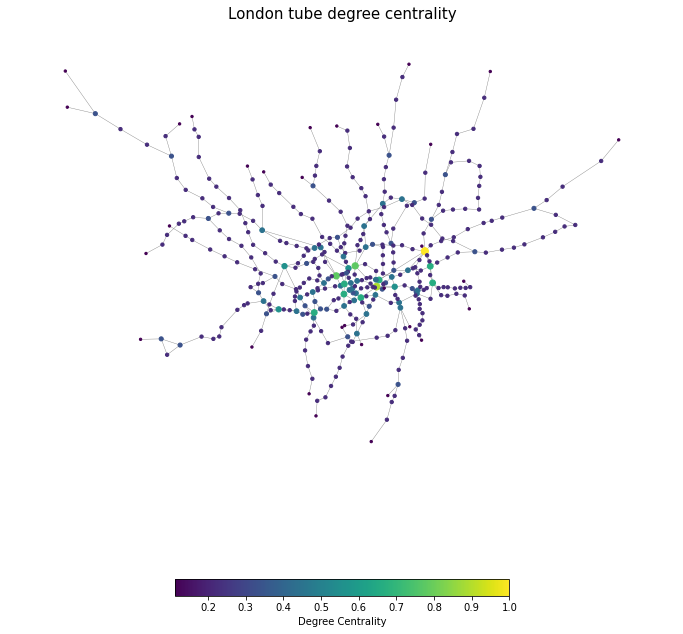

In [130]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]
deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]


# Plot graph

pos = nx.get_node_attributes(G, 'coords')

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### betweenness centrality

In [131]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


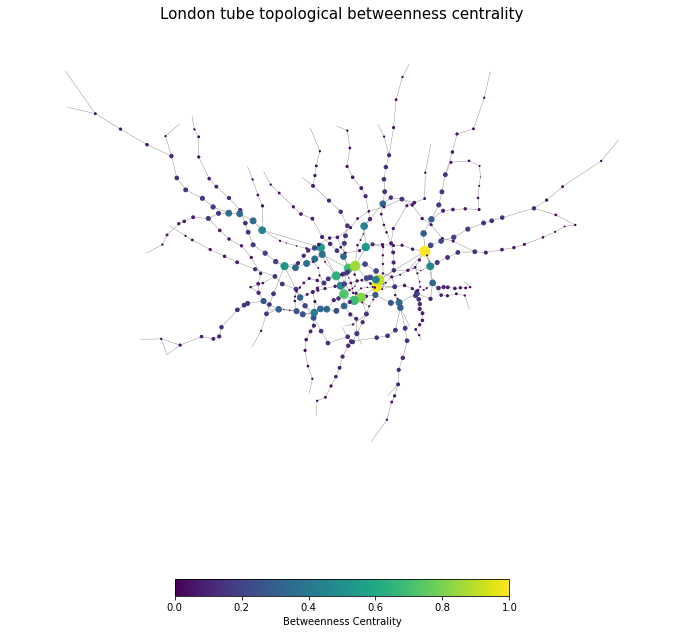

In [132]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### closeness centrality

In [133]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


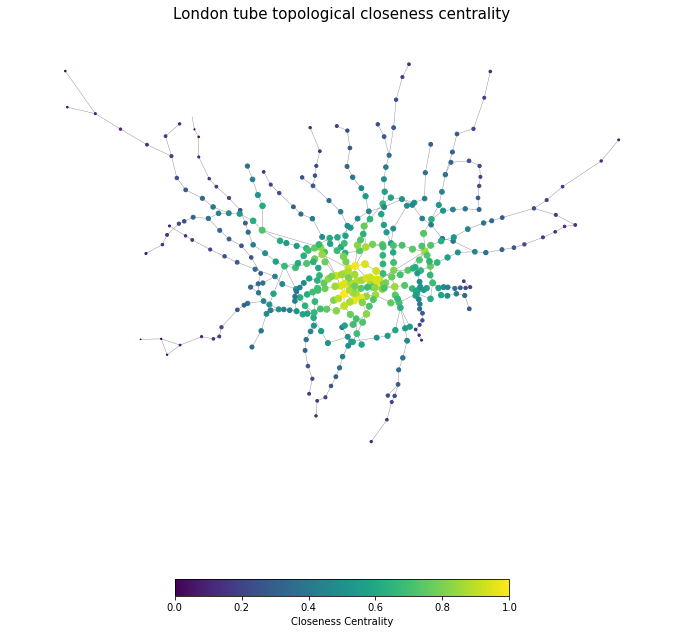

In [134]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

## 3.Node removal

In [135]:
l=list(G.nodes)
count_G = len(l)

In [136]:
def max_connectivity(G):
    if nx.number_connected_components(G) == 1:
        max_con = 1
    else:
        # Get the list of components:
        components = nx.connected_components(G)
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = G.subgraph(largest_component)
        max_con = Largest_subgraph.number_of_nodes()/count_G
    return max_con

In [230]:
def cal_efficiency(G):
    len_path = dict(nx.all_pairs_dijkstra(G))
    nodes = list(G.nodes)
    results = pd.DataFrame()
    for i in range(len(G)):
        try:
            results = results.append(pd.DataFrame(len_path[nodes[i]]).T.reset_index())
        except:
            continue
    results.columns = ['ending_point','weight','path']
    results = results.reset_index()
    del results['index']
    sum_weight = 0
    for i in range(len(results)):
        try:
            sum_weight = sum_weight + (1/results["weight"][i])
        except:
            continue
    mean_eff = sum_weight/(len(G)*(len(G)-1))
    return mean_eff

In [231]:
ori_mean_eff = cal_efficiency(G)

In [232]:
def net_efficiency(data):
    final = cal_efficiency(data)
    result = final / ori_mean_eff
    return result

In [165]:
def cal_flow(G):
    if nx.number_connected_components(G) == 1:
        max_con = 1
    else:
        # Get the list of components:
        components = nx.connected_components(G)
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = G.subgraph(largest_component)
        sum_subflows = 0
        for i in range(len(Largest_subgraph.edges)):
            sum_subflows = sum_subflows + list(Largest_subgraph.edges(data = True))[i][2]["flows"]
        nos_flow_unw = sum_subflows / sum_flows
    return nos_flow_unw

#### degree centrality

In [166]:
G1_for_de = G.copy()
G2_for_de = G.copy()

non-sequential removal

In [167]:
values_sorted = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:20]]

In [168]:
con_list_1 = []
con_list_11 = []

In [169]:
for station in sorted_ten:
    st = [station]
    G1_for_de.remove_nodes_from(st)
    m = max_connectivity(G1_for_de)
    n = net_efficiency(G1_for_de)
    con_list_1.append(m)
    con_list_11.append(n)

sequential removal

In [170]:
deg_london_new = deg_london.copy()

In [171]:
con_list_2 = []
con_list_22 = []

In [172]:
for i in range(20):
    values_sorted = sorted(deg_london_new.items(), key=itemgetter(1), reverse=True)
    maxbet=[e for e,v in values_sorted[0:1]]
    G2_for_de.remove_nodes_from(maxbet)
    m = max_connectivity(G2_for_de)
    n = net_efficiency(G2_for_de)
    con_list_2.append(m)
    con_list_22.append(n)
    deg_london_new =nx.degree_centrality(G2_for_de)

#### betweenness centrality

In [173]:
G1_for_bt = G.copy()
G2_for_bt = G.copy()

non-sequential removal

In [174]:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:20]]

In [175]:
con_list_3 = []
con_list_33 = []

In [176]:
for station in sorted_ten:
    st = [station]
    G1_for_bt.remove_nodes_from(st)
    m = max_connectivity(G1_for_bt)
    n = net_efficiency(G1_for_bt)
    con_list_3.append(m)
    con_list_33.append(n)

sequential removal

In [177]:
bet_london_t_new = bet_london_t.copy()

In [178]:
con_list_4 = []
con_list_44 = []

In [179]:
for i in range(20):
    values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
    maxbet=[e for e,v in values_sorted[0:1]]
    G2_for_bt.remove_nodes_from(maxbet)
    m = max_connectivity(G2_for_bt)
    n = net_efficiency(G2_for_bt)
    con_list_4.append(m)
    con_list_44.append(n)
    bet_london_t_new =nx.betweenness_centrality(G2_for_bt)

#### closeness centrality

In [180]:
G1_for_cl = G.copy()
G2_for_cl = G.copy()

non-sequential removal

In [181]:
values_sorted = sorted(clos_t.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:20]]

In [182]:
con_list_5 = []
con_list_55 = []

In [183]:
for station in sorted_ten:
    st = [station]
    G1_for_cl.remove_nodes_from(st)
    m = max_connectivity(G1_for_cl)
    n = net_efficiency(G1_for_cl)
    con_list_5.append(m)
    con_list_55.append(n)

sequential removal

In [184]:
clos_t_new = clos_t.copy()

In [185]:
con_list_6 = []
con_list_66 = []

In [186]:
for i in range(20):
    values_sorted = sorted(clos_t_new.items(), key=itemgetter(1), reverse=True)
    maxbet=[e for e,v in values_sorted[0:1]]
    G2_for_cl.remove_nodes_from(maxbet)
    m = max_connectivity(G2_for_cl)
    n = net_efficiency(G2_for_cl)
    con_list_6.append(m)
    con_list_66.append(n)
    clos_t_new =nx.closeness_centrality(G2_for_cl)

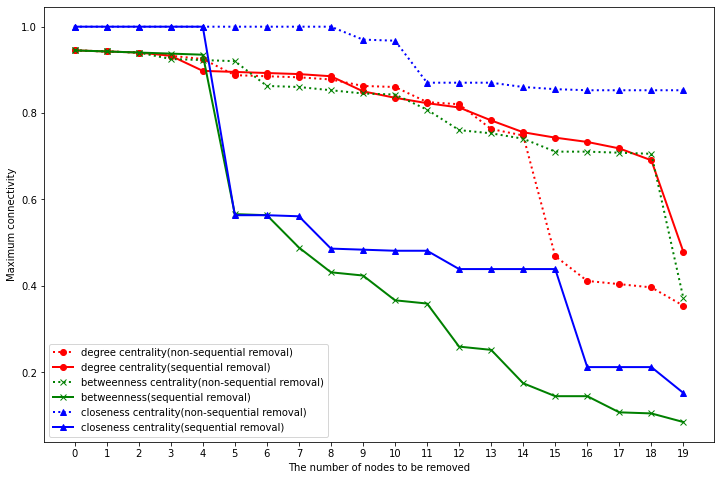

In [187]:
fig, ax = plt.subplots(figsize=(12,8))

# plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
# plt.axis("off")
plt.plot(con_list_1,marker = 'o',color='r',linewidth=2,linestyle=':',label='degree centrality(non-sequential removal)')
plt.plot(con_list_2,marker='o',color='r',linewidth=2,linestyle='-',label='degree centrality(sequential removal)')
plt.plot(con_list_3,marker = 'x',color='g',linewidth=2,linestyle=':',label='betweenness centrality(non-sequential removal)')
plt.plot(con_list_4,marker='x',color='g',linewidth=2,linestyle='-',label='betweenness(sequential removal)')
plt.plot(con_list_5,marker = '^',color='b',linewidth=2,linestyle=':',label='closeness centrality(non-sequential removal)')
plt.plot(con_list_6,marker='^',color='b',linewidth=2,linestyle='-',label='closeness centrality(sequential removal)')
plt.legend()
plt.xlabel("The number of nodes to be removed")
plt.ylabel("Maximum connectivity")
x = plt.MultipleLocator(1)
ax.xaxis.set_major_locator(x)
plt.savefig("max_connectivity22.jpg")

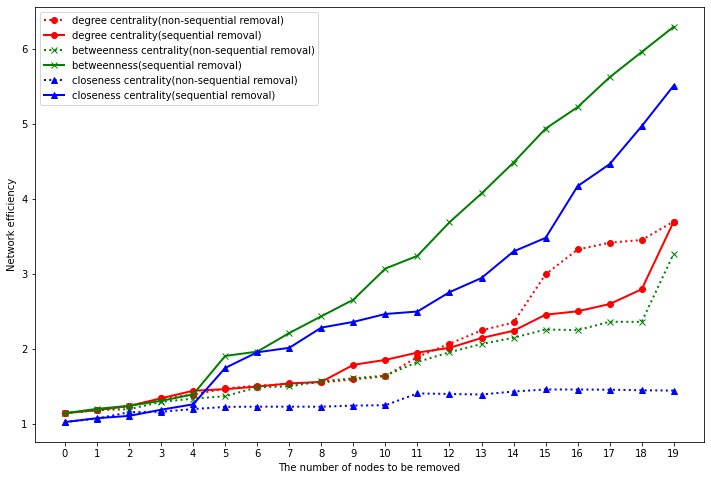

In [188]:
fig, ax = plt.subplots(figsize=(12,8))

# plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
# plt.axis("off")
plt.plot(con_list_11,marker = 'o',color='r',linewidth=2,linestyle=':',label='degree centrality(non-sequential removal)')
plt.plot(con_list_22,marker='o',color='r',linewidth=2,linestyle='-',label='degree centrality(sequential removal)')
plt.plot(con_list_33,marker = 'x',color='g',linewidth=2,linestyle=':',label='betweenness centrality(non-sequential removal)')
plt.plot(con_list_44,marker='x',color='g',linewidth=2,linestyle='-',label='betweenness(sequential removal)')
plt.plot(con_list_55,marker = '^',color='b',linewidth=2,linestyle=':',label='closeness centrality(non-sequential removal)')
plt.plot(con_list_66,marker='^',color='b',linewidth=2,linestyle='-',label='closeness centrality(sequential removal)')
plt.legend()
plt.xlabel("The number of nodes to be removed")
plt.ylabel("Network efficiency")
x = plt.MultipleLocator(1)
ax.xaxis.set_major_locator(x)
plt.savefig("network_efficiency22.jpg")

## 3. Flows: weighted network

#### betweenness network

In [143]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G, weight='flows')

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [144]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
West Hampstead,West Hampstead,0.355909
Gospel Oak,Gospel Oak,0.275025
Finchley Road & Frognal,Finchley Road & Frognal,0.268747
Hampstead Heath,Hampstead Heath,0.267820
Willesden Junction,Willesden Junction,0.240182
Leicester Square,Leicester Square,0.214258
Brondesbury,NaN,0.207093
Brondesbury Park,Brondesbury Park,0.205658
Kensal Rise,Kensal Rise,0.204258
Blackhorse Road,Blackhorse Road,0.201651


#### closeness network

In [145]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,station_name,closeness_w
West Hampstead,West Hampstead,0.000006
Finchley Road & Frognal,Finchley Road & Frognal,0.000006
Brondesbury,NaN,0.000006
Hampstead Heath,Hampstead Heath,0.000006
Gospel Oak,Gospel Oak,0.000006
Upper Holloway,Upper Holloway,0.000006
Crouch Hill,Crouch Hill,0.000006
Brondesbury Park,Brondesbury Park,0.000006
Harringay Green Lanes,Harringay Green Lanes,0.000006
Kentish Town West,Kentish Town West,0.000006


#### Weighted network node removal

In [146]:
G3_for_bt = G.copy()
G4_for_bt = G.copy()

In [147]:
sum_flows = 0
for i in range(len(G.edges)):
    sum_flows = sum_flows + list(G.edges(data = True))[i][2]["flows"]

In [148]:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
station1=[e for e,v in values_sorted[0:1]]
print(station1)
G3_for_bt.remove_nodes_from(station1)
components = nx.connected_components(G3_for_bt)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G3_for_bt.subgraph(largest_component)
sum_subflows1 = 0
for i in range(len(Largest_subgraph.edges)):
    sum_subflows1 = sum_subflows1 + list(Largest_subgraph.edges(data = True))[i][2]["flows"]
nos_flow_unw1 = sum_subflows1 / sum_flows

['Stratford']


In [149]:
nos_flow_unw1

0.9405905659406494

In [150]:
values_sorted = sorted(bet_london_w.items(), key=itemgetter(1), reverse=True)
station2=[e for e,v in values_sorted[0:1]]
print(station2)
G4_for_bt.remove_nodes_from(station2)
components = nx.connected_components(G4_for_bt)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G4_for_bt.subgraph(largest_component)
sum_subflows2 = 0
for i in range(len(Largest_subgraph.edges)):
    sum_subflows2 = sum_subflows2 + list(Largest_subgraph.edges(data = True))[i][2]["flows"]
nos_flow_unw2 = sum_subflows2 / sum_flows

['West Hampstead']


In [151]:
nos_flow_unw2

0.9946581595708806

In [233]:
G5_for_bt = G.copy()
G6_for_bt = G.copy()

In [234]:
G5_for_bt.remove_nodes_from(station1)

In [235]:
net_efficiency(G5_for_bt)

0.8781424375758372

In [219]:
G6_for_bt.remove_nodes_from(station2)

In [220]:
def cal_efficiency_weighted(G):
    len_path = dict(nx.all_pairs_dijkstra(G,weight='flows'))
    nodes = list(G.nodes)
    results = pd.DataFrame()
    for i in range(len(G)):
        try:
            results = results.append(pd.DataFrame(len_path[nodes[i]]).T.reset_index())
        except:
            continue
    results.columns = ['ending_point','weight','path']
    results = results.reset_index()
    del results['index']
    sum_weight = 0
    for i in range(len(results)):
        try:
            sum_weight = sum_weight + (1/results["weight"][i])
        except:
            continue
    mean_eff = sum_weight/(len(G)*(len(G)-1))
    return mean_eff

In [221]:
ori_mean_eff_weighted = cal_efficiency_weighted(G)

In [222]:
def net_efficiency_weighted(data):
    final = cal_efficiency_weighted(data)
    result = final / ori_mean_eff_weighted
    return result

In [223]:
net_efficiency_weighted(G6_for_bt)

0.9320510173545367